# 导入所需的库
导入所有必要的库，包括pandas、numpy、matplotlib、seaborn、scikit-learn中的相关模块以及正则表达式库。每个导入语句后添加注释说明该库的用途。

In [3]:
import pandas as pd  # 数据处理和分析
import numpy as np  # 数值计算
import matplotlib.pyplot as plt  # 数据可视化
import seaborn as sns  # 数据可视化
from sklearn.feature_extraction.text import TfidfVectorizer  # 文本特征提取
from sklearn.cluster import KMeans  # K-means聚类算法
from sklearn.decomposition import PCA, TruncatedSVD  # 降维算法
from sklearn.metrics import silhouette_score  # 聚类评估指标
import re  # 正则表达式库，用于文本清洗

# 加载和预处理数据
定义数据加载和文本清洗函数。加载CSV文件，处理列名，删除空值，并对文本进行基本清洗（小写转换、移除特殊字符等）。提供实时代码执行示例并显示处理前后的数据对比。

In [ ]:
# 定义数据加载和预处理函数
def load_and_preprocess(file_path):
    # 读取CSV文件
    df = pd.read_csv(file_path)
    
    # 确保数据有Comment列
    if 'Comment' not in df.columns:
        raise ValueError("CSV文件中没有'Comment'列")
    
    # 确保没有空值
    df = df.dropna(subset=['Comment'])
    
    # 文本清洗
    df['clean_comment'] = df['Comment'].apply(clean_text)
    
    return df

# 定义文本清洗函数
def clean_text(text):
    # 转换为小写
    text = str(text).lower()
    # 移除特殊字符和多余空格
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

# 加载和预处理数据
file_path = "data/YoutubeCommentsDataSet.csv"  
df = load_and_preprocess(file_path)

# 显示数据基本信息
print(f"数据集共有 {len(df)} 条评论")
print(f"数据集包含的列: {df.columns.tolist()}")

# 显示处理前后的数据对比
print("\n处理前的前5条评论:")
print(df['Comment'].head())
print("\n处理后的前5条评论:")
print(df['clean_comment'].head())

数据集共有 18364 条评论
数据集包含的列: ['Comment', 'Sentiment', 'clean_comment']

处理前的前5条评论:
0    lets not forget that apple pay in 2014 require...
1    here in nz 50 of retailers don’t even have con...
2    i will forever acknowledge this channel with t...
3    whenever i go to a place that doesn’t take app...
4    apple pay is so convenient secure and easy to ...
Name: Comment, dtype: object

处理后的前5条评论:
0    lets not forget that apple pay in 2014 require...
1    here in nz 50 of retailers don t even have con...
2    i will forever acknowledge this channel with t...
3    whenever i go to a place that doesn t take app...
4    apple pay is so convenient secure and easy to ...
Name: clean_comment, dtype: object


# 特征提取与向量化
使用TF-IDF向量化评论文本。展示向量化过程中的参数选择（如max_features、stop_words等）。展示向量化后的特征矩阵的形状和部分内容，以及特征词表示法。

In [5]:
# 使用TF-IDF向量化评论文本
max_features = 1000  # 最大特征数
stop_words = 'english'  # 使用英文停用词
min_df = 2  # 忽略出现次数过少的词

# 初始化TF-IDF向量化器
vectorizer = TfidfVectorizer(max_features=max_features, stop_words=stop_words, min_df=min_df)

# 对清洗后的评论文本进行向量化
X = vectorizer.fit_transform(df['clean_comment'])

# 显示向量化后的特征矩阵的形状
print(f"特征矩阵的形状: {X.shape}")

# 显示部分特征词
feature_names = vectorizer.get_feature_names_out()
print(f"部分特征词: {feature_names[:10]}")

# 显示部分向量化后的特征矩阵内容
print(f"特征矩阵的部分内容:\n{X[:5].toarray()}")

特征矩阵的形状: (18364, 1000)
部分特征词: ['0018' '10' '100' '1010' '11' '1112' '12' '13' '14' '15']
特征矩阵的部分内容:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# 确定最佳聚类数量
使用肘部法则和轮廓系数方法确定最佳的K值。绘制不同K值下的惯性和轮廓系数曲线图，并进行分析解释。添加交互式的K值测试，允许用户尝试不同的K值范围。

In [6]:
from ipywidgets import interact
from matplotlib import rcParams
# 设置中文字体（以 SimHei 为例）
rcParams['font.sans-serif'] = ['SimHei']  # 设置字体为 SimHei（黑体）
rcParams['axes.unicode_minus'] = False   # 解决负号显示问题
# 定义寻找最佳K值的函数
def find_optimal_k(X, max_k=10):
    inertia_values = []
    silhouette_values = []
    k_values = range(2, max_k + 1)
    
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        clusters = kmeans.fit_predict(X)
        inertia_values.append(kmeans.inertia_)
        
        # 计算轮廓系数
        if k > 1:  # 轮廓系数需要至少2个簇
            silhouette_values.append(silhouette_score(X, clusters))
    
    # 绘制肘部图
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(k_values, inertia_values, 'o-')
    plt.xlabel('聚类数量 (k)')
    plt.ylabel('惯性 (Inertia)')
    plt.title('肘部法则')
    plt.grid(True)
    
    plt.subplot(1, 2, 2)
    plt.plot(k_values, silhouette_values, 'o-')
    plt.xlabel('聚类数量 (k)')
    plt.ylabel('轮廓系数')
    plt.title('轮廓系数法')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    # 返回最佳K值（轮廓系数最高的K值）
    best_k = k_values[np.argmax(silhouette_values)]
    return best_k, inertia_values, silhouette_values

# 交互式寻找最佳K值
@interact(max_k=(2, 20))
def interactive_find_optimal_k(max_k=10):
    best_k, inertia_values, silhouette_values = find_optimal_k(X, max_k)
    print(f"根据轮廓系数，最佳的聚类数量为: {best_k}")

interactive(children=(IntSlider(value=10, description='max_k', max=20, min=2), Output()), _dom_classes=('widge…

# 执行K-means聚类
使用确定的最佳K值执行K-means聚类。展示聚类结果的基本统计信息，如各簇的大小分布。计算并展示聚类效果的评估指标，如轮廓系数。

轮廓系数: 0.0236

各簇的大小分布:
cluster
0      665
1     1023
2      505
3      957
4     1448
5    10181
6      866
7     2365
8      354
Name: count, dtype: int64


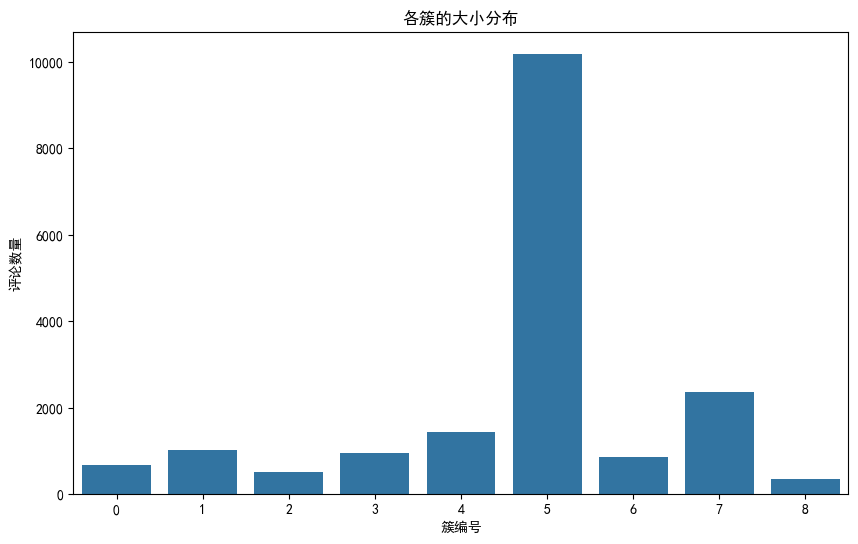

In [ ]:
# 使用确定的最佳K值执行K-means聚类
best_k = 9  

# 执行K-means聚类
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X)

# 将聚类结果添加到数据框中
df['cluster'] = clusters

# 计算并展示聚类效果的评估指标
silhouette = silhouette_score(X, clusters)
print(f"轮廓系数: {silhouette:.4f}")

# 展示聚类结果的基本统计信息
cluster_counts = df['cluster'].value_counts().sort_index()
print("\n各簇的大小分布:")
print(cluster_counts)

# 可视化各簇的大小分布
plt.figure(figsize=(10, 6))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values)
plt.xlabel('簇编号')
plt.ylabel('评论数量')
plt.title('各簇的大小分布')
plt.show()

# 可视化聚类结果
将高维特征空间使用PCA或TruncatedSVD降维到2D进行可视化。绘制散点图展示不同簇的分布，配色方案使各簇区分明显。添加交互元素，如悬停显示评论内容。

In [8]:
# 导入所需的库
from ipywidgets import interact, fixed  # 添加fixed导入
import plotly.express as px
# 可视化聚类结果
def visualize_clusters(X, clusters, df):
    # 使用PCA或TruncatedSVD降维到2D用于可视化
    if isinstance(X, np.ndarray) and X.shape[1] > 2:
        pca = PCA(n_components=2)
        X_2d = pca.fit_transform(X)
    else:  # 对于稀疏矩阵使用TruncatedSVD
        svd = TruncatedSVD(n_components=2)
        X_2d = svd.fit_transform(X.toarray() if hasattr(X, 'toarray') else X)
    
    # 创建可视化DataFrame
    viz_df = pd.DataFrame({
        'x': X_2d[:, 0],
        'y': X_2d[:, 1],
        'cluster': clusters,
        'comment': df['Comment']
    })
    
    # 使用Plotly绘制交互式散点图
    fig = px.scatter(viz_df, x='x', y='y', color='cluster', hover_data=['comment'], title='评论聚类结果')
    fig.show()

# 交互式可视化聚类结果
interact(visualize_clusters, X=fixed(X), clusters=fixed(clusters), df=fixed(df))

d:\work_space\Anaconda\envs\opencv\Lib\site-packages\traitlets\traitlets.py:1764: SparseEfficiencyWarning: Comparing sparse matrices using == is inefficient, try using != instead.
  getattr(cls, name).set(self, value)


interactive(children=(Output(),), _dom_classes=('widget-interact',))

<function __main__.visualize_clusters(X, clusters, df)>

# 分析聚类特征词
分析每个簇的中心向量，提取每个簇的特征词（最重要的词语）。为每个簇展示最具代表性的几条评论。创建词云图或条形图显示每个簇的关键词分布。

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 分析每个簇的特征词
def analyze_clusters(vectorizer, kmeans, df, clusters, top_n=10):
    # 获取每个簇的中心
    centroids = kmeans.cluster_centers_
    
    # 获取特征名（词语）
    feature_names = vectorizer.get_feature_names_out()
    
    # 为每个簇找出最重要的词语
    cluster_terms = {}
    for i in range(len(centroids)):
        # 获取中心向量并排序，得到指标
        centroid = centroids[i]
        ordered_terms = [feature_names[term_idx] for term_idx in centroid.argsort()[:-(top_n+1):-1]]
        cluster_terms[i] = ordered_terms
    
    # 打印每个簇的关键词
    for cluster_id, terms in cluster_terms.items():
        print(f"簇 {cluster_id}:")
        print(f"  关键词: {', '.join(terms)}")
        
        # 计算这个簇中文档数量
        cluster_df = df[clusters == cluster_id]
        print(f"  文档数量: {len(cluster_df)}")
        
        # 打印3个代表性评论
        print("  示例评论:")
        for _, row in cluster_df.sample(min(3, len(cluster_df))).iterrows():
            print(f"    - {row['Comment'][:100]}...")
        print()
    
    # 返回簇的关键词
    return cluster_terms

# 分析每个簇的特征词
cluster_terms = analyze_clusters(vectorizer, kmeans, df, clusters)

# 创建词云图显示每个簇的关键词分布
def plot_wordcloud(cluster_id, cluster_terms):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(cluster_terms[cluster_id]))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'簇 {cluster_id} 的关键词词云')
    plt.show()

# 交互式展示每个簇的关键词词云
interact(plot_wordcloud, cluster_id=(0, best_k-1), cluster_terms=fixed(cluster_terms))

簇 0:
  关键词: videos, love, effort, best, thank, make, im, really, appreciate, thanks
  文档数量: 665
  示例评论:
    - i love animal videos but this one has some flat out incorrect information elephants for example do n...
    - people who take time out of their lives to make this much content over challenging subjects are the ...
    - im a college student wanting to explore this field youre been a great help id love to watch ur video...

簇 1:
  关键词: thank, video, really, sir, helpful, sharing, im, love, job, time
  文档数量: 1023
  示例评论:
    - thank you for this report well done and very helpful...
    - renewed confidence that i can get through all this chemistry i have to take to be a biologist thank ...
    - dear organic chemistry tutor i am preparing for biology and chemistry exams after not taking these c...

簇 2:
  关键词: amazing, work, love, just, thank, game, looks, video, good, like
  文档数量: 505
  示例评论:
    - ill never get tired of watching this masterpiece direct the game has so much cont

interactive(children=(IntSlider(value=4, description='cluster_id', max=8), Output()), _dom_classes=('widget-in…

<function __main__.plot_wordcloud(cluster_id, cluster_terms)>